# Data Augmentation 

### Notebook designed to analyze a dataSet and generate a new, balanced one. Save images after applying transformations with fastAI v2.

## Update ipython/ipykernel (Colab)

In [ ]:
# This magic cell should be put first in your colab notebook. 
# It'll automatically upgrade colab's really antique ipython/ipykernel to their 
# latest versions which are required for packages like ipyexperiments 
from packaging import version
import IPython, ipykernel
IPython.__version__
if version.parse(IPython.__version__) <= version.parse("5.5.0"):
    !pip install -q --upgrade ipython
    !pip install -q --upgrade ipykernel
    
    import os
    import signal
    os.kill(os.getpid(), signal.SIGTERM)
print(f"ipykernel=={ipykernel.__version__}")
print(f"IPython=={IPython.__version__}")

ipykernel==5.5.3
IPython==7.22.0


In [ ]:
# new (large)
# !pip install ipyexperiments
# new (large)
# from ipyexperiments import IPyExperimentsPytorch
# exp = IPyExperimentsPytorch()

## Check GPU e CPU RAM

In [ ]:
import torch
from pynvml import *
nvmlInit()
def log_mem():
    h = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(h)
    print(f'GPU total Memory    : {info.total}')
    print(f'GPU free Memory     : {info.free}')
    print(f'GPU Memory used     : {info.used}')
torch.ones(1).to(0)
log_mem()

GPU total Memory    : 15843721216
GPU free Memory     : 14738522112
GPU Memory used     : 1105199104


## Mount the Google Drive to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path_to_drive = "/content/drive/My Drive/Colab Notebooks/"

Mounted at /content/drive


## Install Deep Learning libraries

In [ ]:
  !pip uninstall fastai
  !pip install fastai

In [1]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.9.2 (default, Mar 16 2021, 09:09:15) 
[GCC 7.5.0]
Pytorch: 1.7.1
Fastai: 2.2.7


## Data Augmentation

In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from torchvision.utils import save_image
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import PIL 
import os

### Create Augmented Folder


In [26]:
pathToDataSet = '/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/'
pathToAugmentedFolder = pathToDataSet + 'augmentedData/'
path_anno = pathToDataSet + 'gt/'
path_img = pathToDataSet + 'done/'
get_y_fn = lambda x : path_anno + f'{x.stem}_GT.png'


fnames = get_image_files(path_anno)
print(len(fnames))



508


In [4]:
try: 
    os.mkdir(pathToAugmentedFolder)
    print('Created Augmented Folder')
except OSError as error:
    print(error)

[Errno 17] File exists: '/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/augmentedData/'


### Generate DataSet Histogram

In [5]:
totalArray = []

for i in range(0,len(fnames)):
    img = Image.open(fnames[i])
    arr = np.asarray(img)
    totalArray += list(np.unique(arr,return_counts=False))

print('Array Generated')


Array Generated


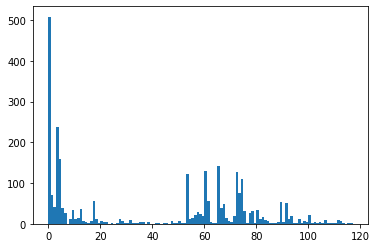

In [7]:
hist = plt.hist(totalArray, bins=117, range=(0,117))
codes = np.loadtxt( pathToDataSet + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[0] for code in codes] #pega apenas o ID de cada classe e ignora o nome
dicionario = {}


for code, contagem in zip(codes, hist[0]):
    dicionario[code] = int(contagem)

dicionario = {k: v for k, v in sorted(dicionario.items(), key=lambda item: item[1], reverse=True)} #sort



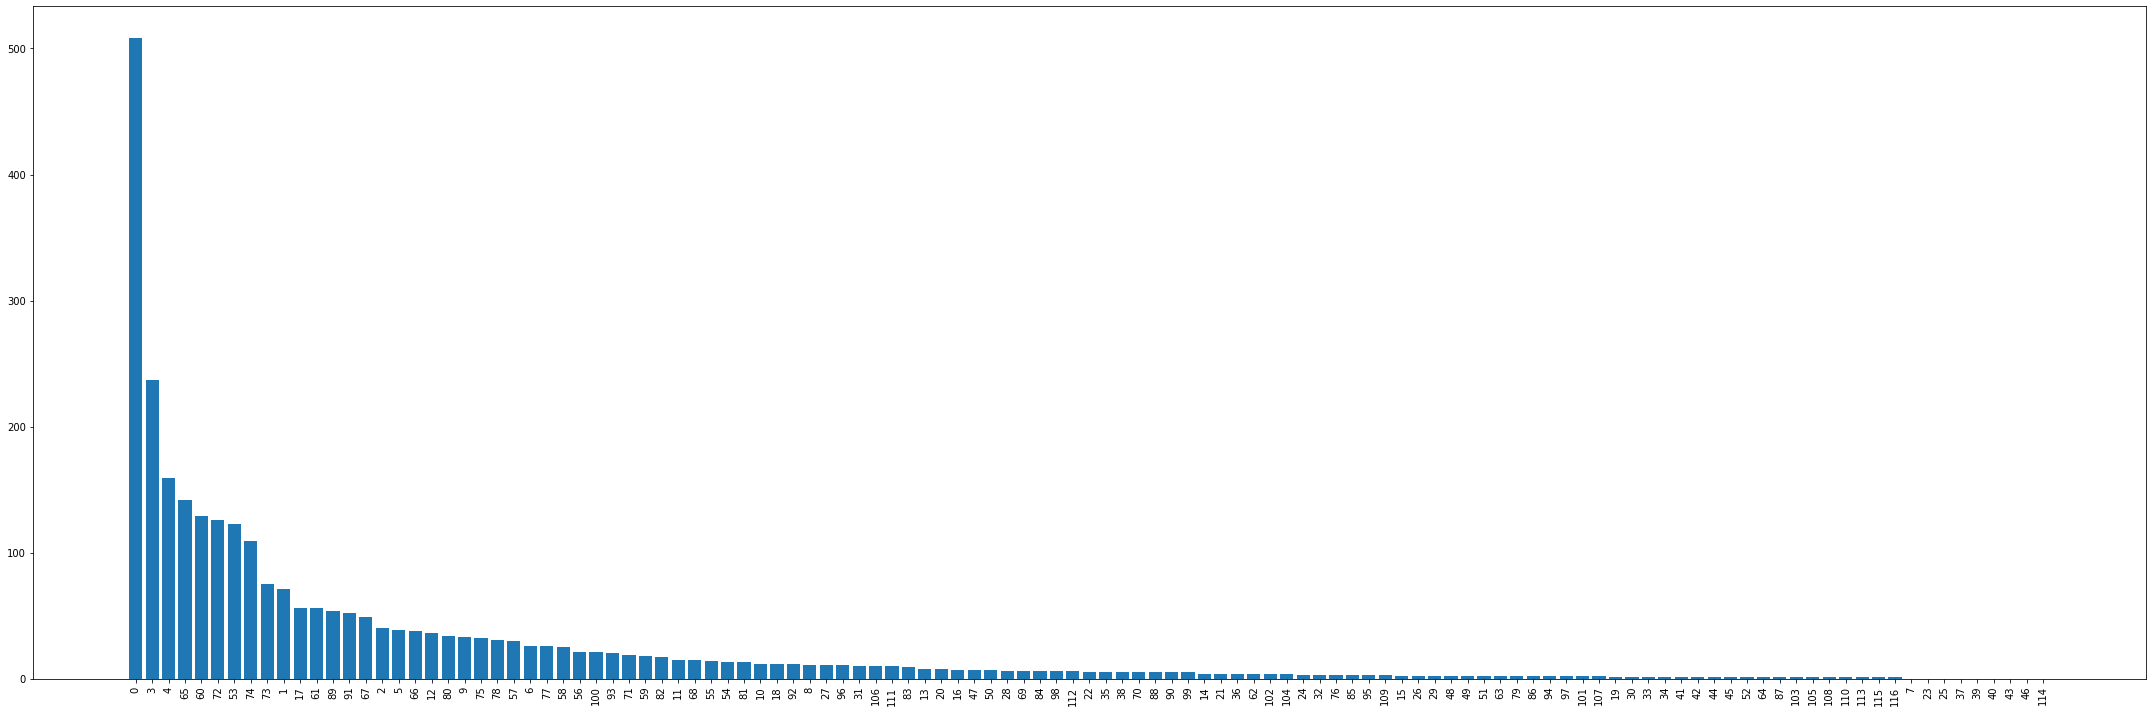

In [8]:
plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionario.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('originalClassesHist.png')
plt.show()

In [9]:
#The idx 1 is related to the class that appears the most, except for the backGround class 0.

print('Class that most appears >>> ', list(dicionario.items())[1][0])
print('Appears >>> ', list(dicionario.items())[1][1], ' times')

dataBaseImageNumberThreshold =  list(dicionario.items())[1][1]

Class that most appears >>>  3
Appears >>>  237  times


In [10]:
def createClassFolder(classId):

    try: 
        os.mkdir(pathToAugmentedFolder + classId)
        print('Class Folder Created')
    except OSError as error:
        print(error)
        return 

In [11]:
def copyImagesToClassFolder(imagesPaths):
    
  for imagePath in imagesPaths:
    img = Image.open(imagePath)
    img = img.save(str(imagePath).replace('done', 'augmentedData'))

    print("Copied Images Successfully")


In [31]:
def getImagesByClass(classId):
    fnames = get_image_files(path_anno)
    imagesToBeCopiedList = []

    for i in range(0, len(fnames)):
        img = Image.open(fnames[i])
        arr = np.asarray(img)
        print(fnames[i])
        idsInGT = list(np.unique(arr,return_counts=False))
        print(idsInGT)
        if classId in idsInGT:
            imagesToBeCopiedList.append(fnames[i])
            stringWithoutGTPath = str(fnames[i]).replace(path_anno, '')
            rawImageName = stringWithoutGTPath.replace('_GT.png', '.jpg')
            imagesToBeCopiedList.append(path_img + classId + '/' + rawImageName)

    return imagesToBeCopiedList

In [22]:
def createFolderForClass(classId, numberOfImagesNeeded):

    print('Class folder creation: ' + classId)

    createClassFolder(classId)

    imagesToBeCopied = getImagesByClass(classId)
    print('Respect', imagesToBeCopied)

    copyImagesToClassFolder(imagesToBeCopied)

      





In [32]:
for key,value in list(dicionario.items()):
    
    numberOfAppearences = value

    if numberOfAppearences < dataBaseImageNumberThreshold:

        numberOfImagesNeeded = dataBaseImageNumberThreshold - numberOfAppearences

        print(numberOfImagesNeeded)
        createFolderForClass(key, numberOfImagesNeeded)
        break

nB/2020.2/TG/dataset_v1/gt/500_GT.png
[0, 1, 12]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/501_GT.png
[0, 5, 59, 62, 78, 100]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/503_GT.png
[0, 5, 17, 56, 82, 83]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/504_GT.png
[0, 2, 17, 49, 83, 101]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/505_GT.png
[0, 1, 2, 10]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/507_GT.png
[0, 5, 17, 56, 78, 100]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/508_GT.png
[0, 3, 9, 60]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/509_GT.png
[0, 31]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/510_GT.png
[0, 3, 4, 29, 53]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/511_GT.png
[0, 1, 24, 66, 100]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/512_GT.png
[0, 2, 26, 58, 83]
/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/gt/513_GT.png
[0, 2, 26, 58, 

## Dataloaders

In [68]:
sizeImage = (512,512)
bs = 1
fnames = get_image_files(path_img)

tfms = aug_transforms(pad_mode='zeros', mult=2, min_scale=1, flip_vert=True, size=sizeImage)

In [69]:
dataloaders = SegmentationDataLoaders.from_label_func(path_img, bs=bs,
    fnames = fnames, 
    label_func = get_y_fn,                                     
    codes = codes,   
    valid_pct=0.0,
    shuffle=False,
    seed=None,                
    batch_tfms=[*tfms, Normalize.from_stats(*imagenet_stats)])

dataloaders.vocab = codes

In [65]:
len(dataloaders.train_ds), len(dataloaders.valid_ds)

(508, 0)

In [4]:
for idx, batch in enumerate(dataloaders.train):
  
  cmap = matplotlib.colors.ListedColormap (np.random.rand(256,3))
  augmentedImage = batch[0].cpu().squeeze().permute(1,2,0).numpy()
  augmentedGroundTruth = batch[1].cpu().squeeze(axis=2).permute(1,2,0).numpy()
  


  plt.imshow(augmentedImage, cmap=cmap, vmin=0, vmax=255)
  plt.show()

  plt.imshow(augmentedGroundTruth, cmap=cmap, vmin=0, vmax=255)
  plt.show()
  

NameError: name 'dataloaders' is not defined

In [66]:
dataloaders.show_batch(max_n=4, figsize=(5, 5), cmap=cmap)

NameError: name 'cmap' is not defined